<Figure size 640x480 with 0 Axes>

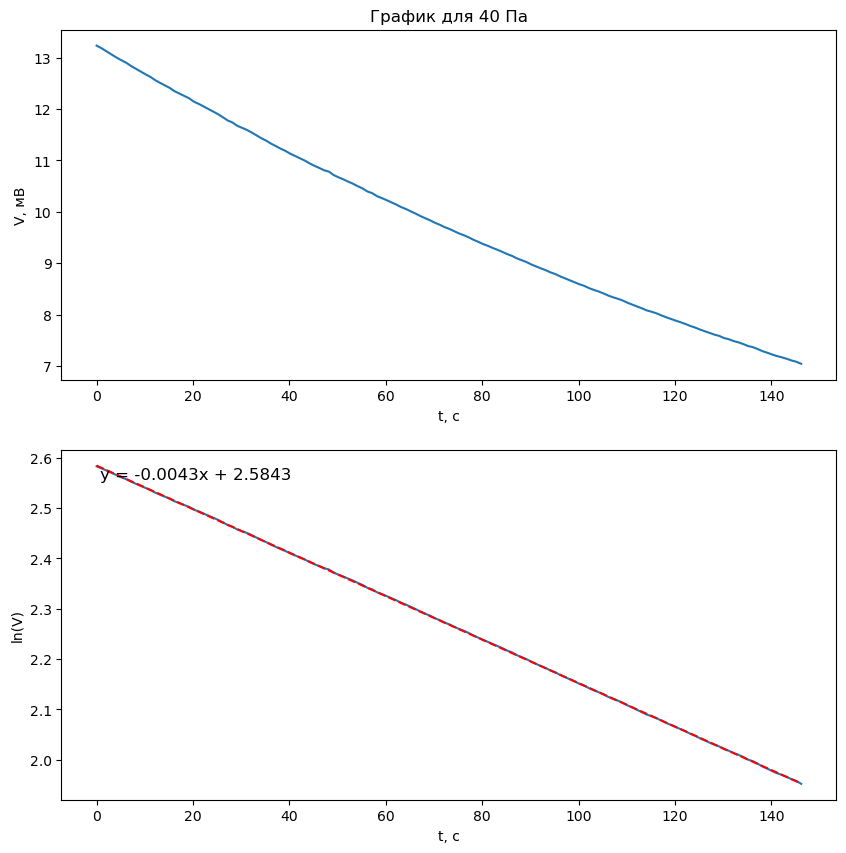

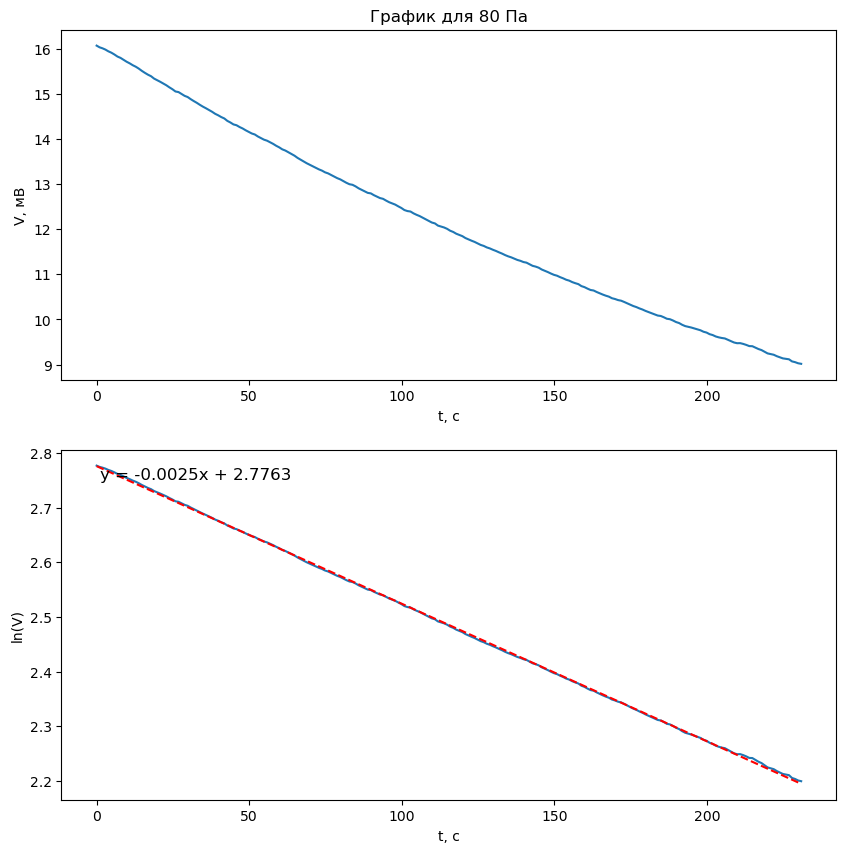

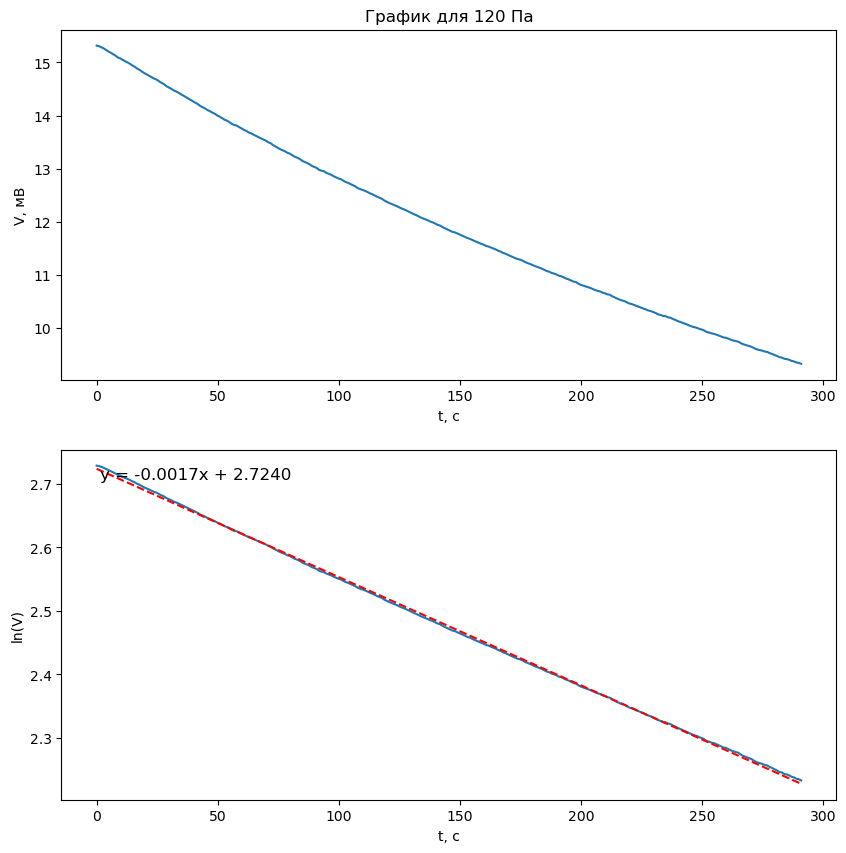

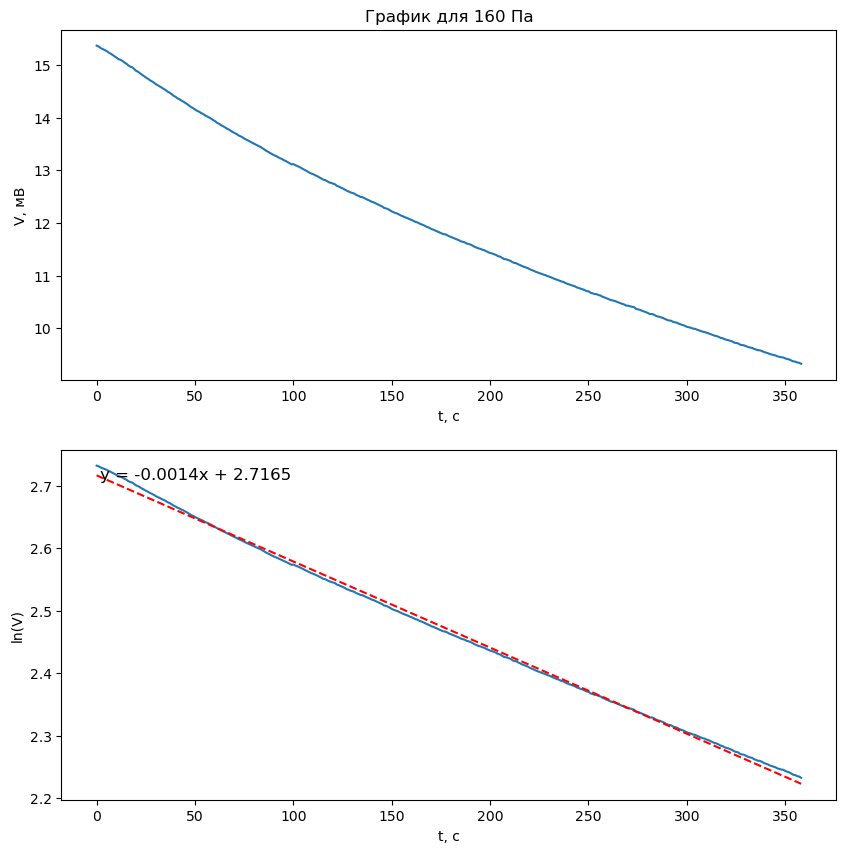

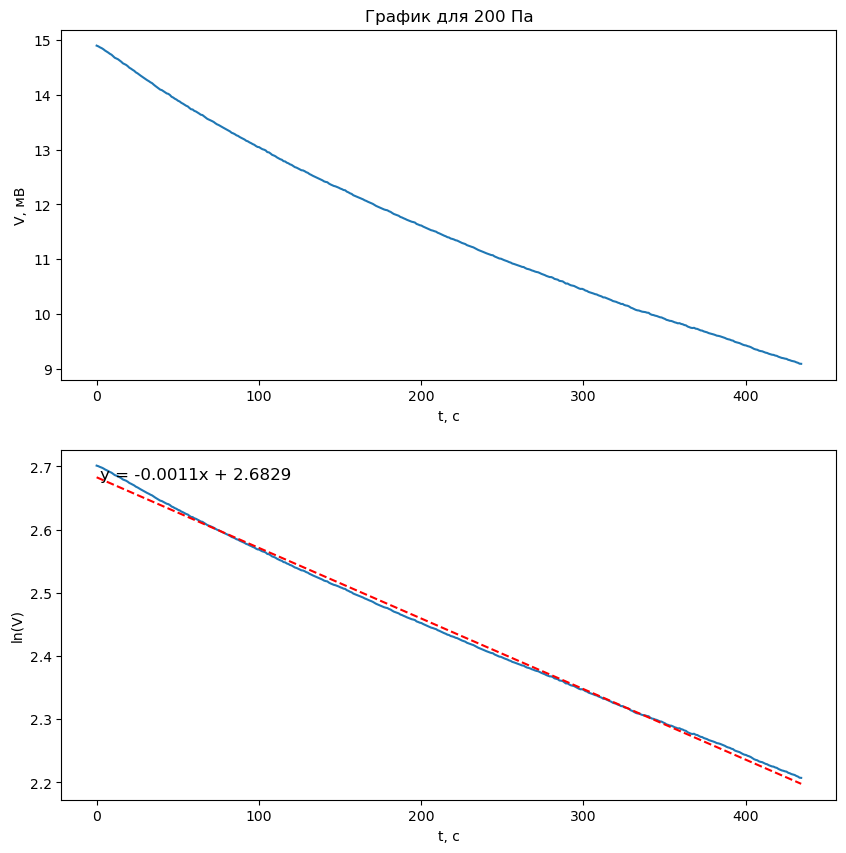

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Список с именами файлов
file_names = ["40.csv", "80.csv", "120.csv", "160.csv", "200.csv"]
data = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    arguments = df["t (s)"]
    values = df["V (mV)"]
    data.append((arguments, values))

for i, (arguments, values) in enumerate(data, start=1):
    plt.figure(i)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(arguments, values)
    plt.xlabel("t, с")
    plt.ylabel("V, мВ")
    plt.title(f"График для {40 * i} Па")

    
    valid_indices = values > 0
    ln_arguments = arguments[valid_indices]
    ln_values = np.log(values[valid_indices])
    
    ax2 = plt.subplot(2, 1, 2)
    ln_values = np.log(values)
    plt.plot(arguments, ln_values)
    plt.xlabel("t, с")
    plt.ylabel("ln(V)")

    coeffs = np.polyfit(ln_arguments, ln_values, 1)
    line = np.poly1d(coeffs)
    plt.plot(ln_arguments, line(ln_arguments), color='red', linestyle='--')

    # Add equation of the line
    equation = "y = {:.4f}x + {:.4f}".format(coeffs[0], coeffs[1])
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top')



plt.show()